# Write-up


# appendix code

In [33]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

### Instructions
Your case study is to build a linear regression model using L1 or L2 regularization (or both) the task to predict the Critical Temperature as closely as possible. In addition, include in your write-up which variable carries the most importance. 

In [34]:
#data
unique_m = pd.read_csv("unique_m.csv")
train = pd.read_csv("train.csv")


### EDA

In [35]:
#lets start with looking at the data
unique_m.describe()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0,21263.000000
mean,0.017685,0.0,0.012125,0.034638,0.142594,0.384968,0.013284,3.009129,0.014874,0.0,...,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0,0.0,34.421219
std,0.267220,0.0,0.129552,0.848541,1.044486,4.408032,0.150427,3.811649,0.132119,0.0,...,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0,0.0,34.254362
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000210
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.365000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,20.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,63.000000
max,14.000000,0.0,3.000000,40.000000,105.000000,120.000000,12.800000,66.000000,4.000000,0.0,...,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0,185.000000


In [36]:
train.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [37]:
train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [38]:
train.shape

(21263, 82)

In [39]:
unique_m.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [40]:
data = train
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [41]:
#get the target then drop it from the data to scale the data
target = data['critical_temp'].copy()
target = target.values
data = data.drop('critical_temp',axis=1)


In [42]:
#next we will want to standard scale our data before we check for colineararity
#I just realized we have material in this dataset. we will need to go back and drop that column since it is one hot encoded already
#we can not standard scale our categorical var

scale_data = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns)
scale_data
#one thing to note is to not standard scale your data after you have removed your target
#otherwise your target won't be on the same scale as your data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,-0.080058,0.046733,-0.451651,-0.158850,-0.611819,0.044358,-0.003707,0.133725,-0.053039,0.378186,...,-0.907755,-0.752156,-0.805912,-0.711705,0.186292,0.035183,-0.837959,-0.406166,-0.838372,-0.520070
1,0.614744,0.174269,-0.432071,0.059368,-0.604180,0.777430,-0.015267,0.133725,0.108900,0.134901,...,-1.147084,-0.752156,-1.116731,-0.719454,0.664971,-0.014779,-0.033011,-0.362352,-0.426866,-0.450821
2,-0.080058,0.046733,-0.450978,-0.158850,-0.611658,0.044358,-0.218984,0.133725,0.093294,0.378186,...,-0.907755,-0.740164,-0.805912,-0.700728,0.186292,-0.062235,-0.837959,-0.376957,-0.838372,-0.503304
3,-0.080058,0.046733,-0.451314,-0.158850,-0.611739,0.044358,-0.103615,0.133725,0.020128,0.378186,...,-0.907755,-0.746160,-0.805912,-0.706224,0.186292,-0.010538,-0.837959,-0.391562,-0.838372,-0.511524
4,-0.080058,0.046733,-0.452324,-0.158850,-0.611980,0.044358,0.162775,0.133725,-0.199372,0.378186,...,-0.907755,-0.764149,-0.805912,-0.722618,0.186292,0.113627,-0.837959,-0.435376,-0.838372,-0.538178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,-0.080058,0.653740,-0.593991,0.361744,-0.420307,0.031615,0.473913,0.572626,-0.657124,1.066745,...,0.049562,0.337829,0.159787,0.394987,0.208923,-0.366001,-0.837959,0.701200,-0.838372,-0.388706
21259,0.614744,0.158685,-0.715653,-0.208768,-0.700465,0.432089,1.264895,1.332391,-0.959386,1.239871,...,-0.955620,-0.928046,-0.848370,-0.865598,0.759220,0.747878,-0.837959,-0.591160,-0.906487,-1.011981
21260,-1.469660,0.407927,0.675457,0.906983,1.007482,-1.300993,-1.329515,-1.868861,0.734817,-1.878471,...,1.246207,1.382509,1.353046,1.469098,-1.548333,-1.583774,-0.837959,1.755341,-0.700159,-0.601416
21261,-1.469660,0.407927,0.719844,0.906983,1.046684,-1.300993,-1.053776,-1.868861,-0.078244,-1.878471,...,1.246207,1.290167,1.353046,1.370404,-1.548333,-1.249706,-0.837959,0.743230,-0.700159,-0.464240


#### Recap
we have our cleaned up and scaled data (scale_data)\
our scaled target (target)\
our cross validation object (cv)\
\
next, we will check for colinearity, clean the data more from those results then run L1 and L2 to compare

In [43]:
len(scale_data.columns)

81

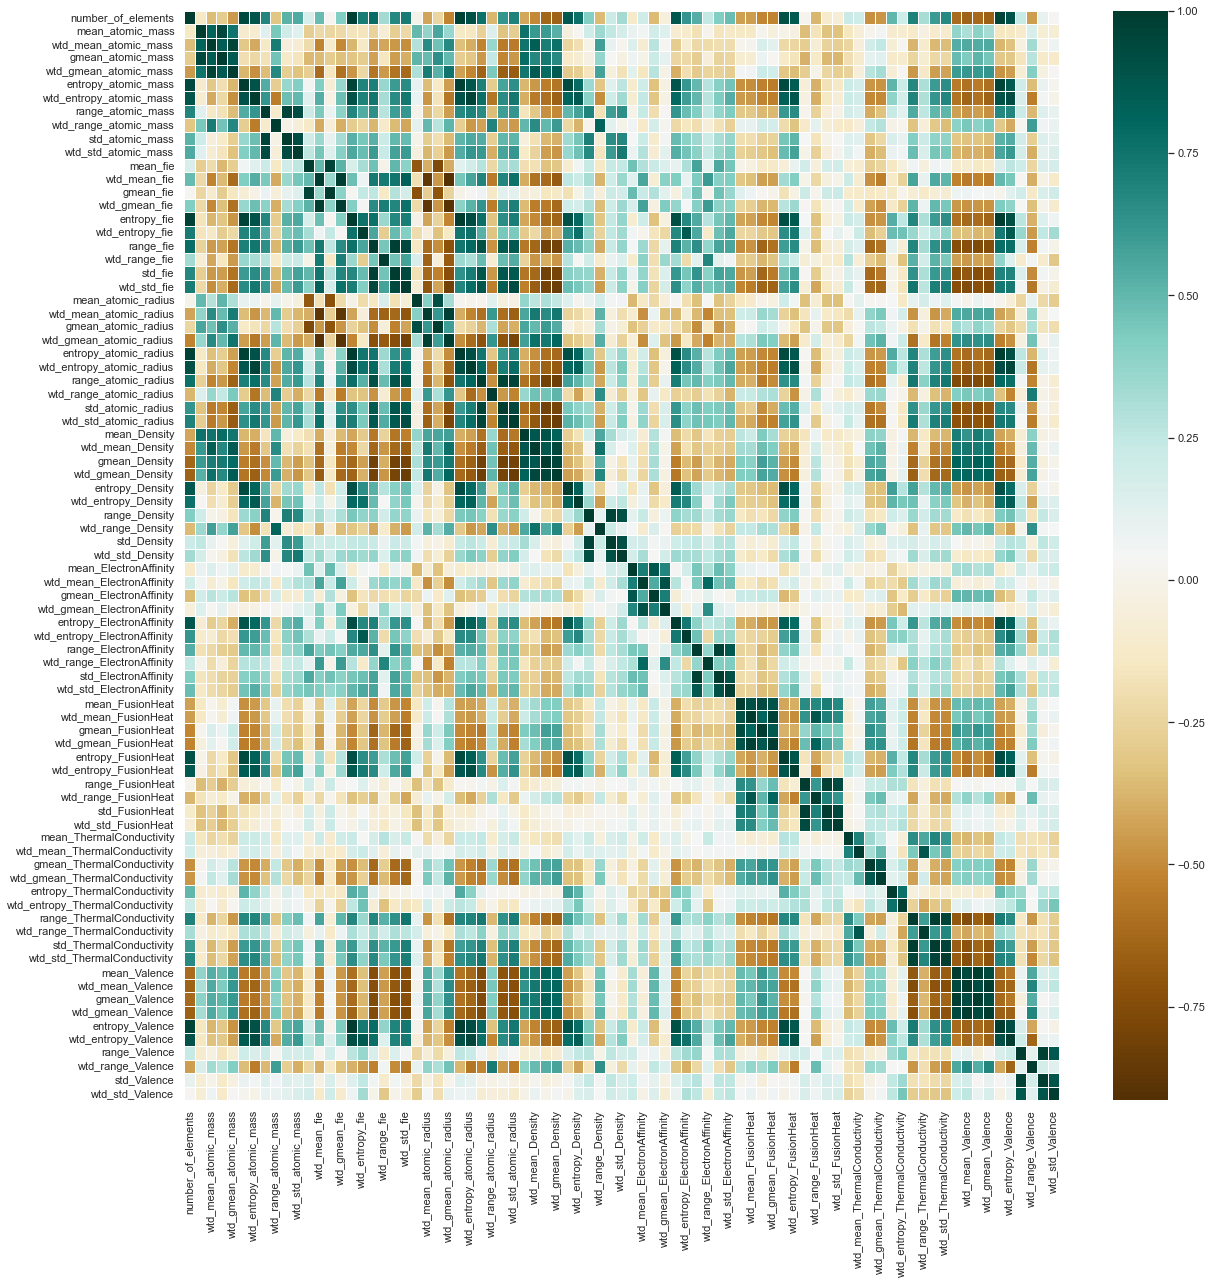

In [44]:
#heatmap time
#resource: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
sns.set()
f, ax= plt.subplots(figsize=(18,18))

sns.heatmap(scale_data.corr(),cmap='BrBG',fmt='.3f',linewidth=.5,ax=ax)
f.tight_layout()
#looking at the elements I think we can drop them from the dataset

In [45]:
# lastly lets look for multicolinearirty
#the threshold I will use is .9 otherwise I end up dropping too many columns
corrl = set()
values = scale_data.corr()

for i in range(len(values.columns)):
    for j in range(i):
        if abs(values.iloc[i, j]) > 0.9:
            colname = values.columns[i]
            corrl.add(colname)
len(corrl)

38

In [73]:
corrl

{'entropy_Density',
 'entropy_ElectronAffinity',
 'entropy_FusionHeat',
 'entropy_Valence',
 'entropy_atomic_mass',
 'entropy_atomic_radius',
 'entropy_fie',
 'gmean_FusionHeat',
 'gmean_Valence',
 'gmean_atomic_mass',
 'gmean_atomic_radius',
 'gmean_fie',
 'range_atomic_radius',
 'std_Density',
 'std_ElectronAffinity',
 'std_FusionHeat',
 'std_ThermalConductivity',
 'std_Valence',
 'std_atomic_mass',
 'std_atomic_radius',
 'std_fie',
 'wtd_entropy_FusionHeat',
 'wtd_entropy_Valence',
 'wtd_entropy_atomic_radius',
 'wtd_gmean_Density',
 'wtd_gmean_FusionHeat',
 'wtd_gmean_Valence',
 'wtd_gmean_atomic_mass',
 'wtd_gmean_atomic_radius',
 'wtd_gmean_fie',
 'wtd_mean_FusionHeat',
 'wtd_mean_Valence',
 'wtd_std_Density',
 'wtd_std_FusionHeat',
 'wtd_std_ThermalConductivity',
 'wtd_std_atomic_mass',
 'wtd_std_atomic_radius',
 'wtd_std_fie'}

In [46]:
scale_data = scale_data.drop(labels=corrl,axis=1)
scale_data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,mean_fie,wtd_mean_fie,wtd_entropy_fie,range_fie,...,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,mean_Valence,range_Valence,wtd_range_Valence,wtd_std_Valence
0,-0.080058,0.046733,-0.451651,-0.003707,0.133725,-0.053039,0.066413,0.975930,-0.404893,0.769935,...,-0.668821,-0.663995,-1.286879,-0.870857,0.939383,-0.113755,-0.907755,-0.837959,-0.406166,-0.520070
1,0.614744,0.174269,-0.432071,-0.015267,0.133725,0.108900,-0.036288,0.978333,-0.358216,0.769935,...,-0.404521,-0.664051,0.367440,0.087089,1.128420,-0.246269,-1.147084,-0.033011,-0.362352,-0.450821
2,-0.080058,0.046733,-0.450978,-0.218984,0.133725,0.093294,0.066413,0.979779,-0.458387,0.769935,...,-0.668821,-0.664066,-1.286879,-0.909730,0.939383,-0.113755,-0.907755,-0.837959,-0.376957,-0.503304
3,-0.080058,0.046733,-0.451314,-0.103615,0.133725,0.020128,0.066413,0.977855,-0.429686,0.769935,...,-0.668821,-0.664031,-1.286879,-0.889093,0.939383,-0.113755,-0.907755,-0.837959,-0.391562,-0.511524
4,-0.080058,0.046733,-0.452324,0.162775,0.133725,-0.199372,0.066413,0.972082,-0.363750,0.769935,...,-0.668821,-0.663923,-1.286879,-0.839524,0.939383,-0.113755,-0.907755,-0.837959,-0.435376,-0.538178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,-0.080058,0.653740,-0.593991,0.473913,0.572626,-0.657124,-1.232643,-0.814162,0.000972,-0.966459,...,0.367881,1.684327,0.924543,0.296448,-0.736569,0.487354,0.049562,-0.837959,0.701200,-0.388706
21259,0.614744,0.158685,-0.715653,1.264895,1.332391,-0.959386,-0.249578,0.833201,0.184858,0.769935,...,-0.355101,-0.640231,0.681888,0.645814,0.939383,0.327985,-0.955620,-0.837959,-0.591160,-1.011981
21260,-1.469660,0.407927,0.675457,-1.329515,-1.868861,0.734817,-0.412232,-1.248386,-1.151481,-1.396359,...,0.941830,0.739739,-0.134245,0.061134,-1.473810,-0.766032,1.246207,-0.837959,1.755341,-0.601416
21261,-1.469660,0.407927,0.719844,-1.053776,-1.868861,-0.078244,-0.412232,-1.140977,-0.831862,-1.396359,...,0.941830,0.783116,-0.134245,0.376068,-1.473810,-1.084893,1.246207,-0.837959,0.743230,-0.464240


### LR

In [47]:
lr = LinearRegression()
lr.fit(scale_data,target)
mse = mean_squared_error(target, lr.predict(scale_data))
mse

357.6745038467376

In [48]:
lr.coef_

array([ -3.17888943,   2.7012873 ,  -0.4611252 ,   6.66206661,
         7.46504201,  -1.81906188,   1.47179849,   2.22398223,
         1.23209757,   4.54050482,   6.26802138,  -2.56666616,
         8.82609733,  -5.18045913,  -5.81666546,  -0.13879706,
         1.37031165,  -0.82572325,  -2.42170112,   2.41717074,
         7.61302713,  10.69124836,  -4.51162782, -12.99125402,
        -5.97147725,  -3.96148616,  -4.93817675,  -2.36351898,
         2.31089709,  -3.14768175,   0.16167946,  -2.25974377,
        22.56181789,   0.19740105, -16.04229796,   1.55078378,
         3.01782397,   2.03536797,  -4.66096777,  -2.47105319,
         3.47024794,   4.1482649 ,  -9.01878997])

In [49]:
for i in range(len(scale_data.columns)):
    print(scale_data.columns[i], lr.coef_[i])

number_of_elements -3.1788894334721056
mean_atomic_mass 2.7012873044258043
wtd_mean_atomic_mass -0.4611252001623763
wtd_entropy_atomic_mass 6.662066611827103
range_atomic_mass 7.4650420055595905
wtd_range_atomic_mass -1.8190618806362926
mean_fie 1.4717984903277161
wtd_mean_fie 2.2239822270611413
wtd_entropy_fie 1.2320975712611884
range_fie 4.540504817933865
wtd_range_fie 6.268021377986679
mean_atomic_radius -2.5666661622997893
wtd_mean_atomic_radius 8.826097329474827
wtd_range_atomic_radius -5.180459133263278
mean_Density -5.816665461734303
wtd_mean_Density -0.13879706036798561
gmean_Density 1.3703116504132493
wtd_entropy_Density -0.8257232456626443
range_Density -2.4217011244248896
wtd_range_Density 2.4171707440894323
mean_ElectronAffinity 7.613027128456711
wtd_mean_ElectronAffinity 10.691248358663573
gmean_ElectronAffinity -4.511627817463241
wtd_gmean_ElectronAffinity -12.991254020813935
wtd_entropy_ElectronAffinity -5.971477251684408
range_ElectronAffinity -3.9614861583141456
wtd_ra

### LASSO

In [50]:
#much like the prof said we will need to cross validate otherwise he will be upset
#and as a good ds should
#we will use sklearn's kfold cv split
cv = KFold(n_splits=10,shuffle=True, random_state=268)
#this is our cv obejct to call later that holds our kfold choice

In [51]:
l1_model = Lasso(alpha=1)
#lets tune alfpha
alpha = 1
for i in range(5):
    l1_model.alpha=alpha
    l1_model.fit(scale_data,target)
    print(alpha,l1_model.coef_)
    print("--------")
    alpha = alpha/10

1 [ 0.         -0.         -0.          6.93418504  4.03260346 -0.
  0.          0.          0.          2.81463094  0.          0.
  0.         -0.         -0.         -0.         -1.70394712 -0.
 -0.         -0.         -0.          0.         -0.5042322  -3.78285942
 -2.10422436  0.         -0.          0.         -0.         -0.67355053
 -0.          0.2674228  12.47841118 -0.         -9.94046636  0.
  0.          1.1761615   0.         -1.10061357 -0.          0.
 -5.29863067]
--------
0.1 [-0.00000000e+00  8.84083492e-01  4.63372351e-03  7.82058844e+00
  7.33829978e+00 -7.18594028e-01  2.77572498e+00  3.52180563e-01
 -0.00000000e+00  2.95646018e+00  2.98254379e+00 -0.00000000e+00
  4.51161238e+00 -3.44323833e+00 -3.48583322e+00  0.00000000e+00
 -3.85583059e-01 -1.14541314e+00 -2.31541368e+00  1.45194556e+00
  2.59612619e+00  4.80313110e+00 -2.94691947e-01 -8.53291108e+00
 -6.73350069e+00 -1.44352551e+00 -2.91134572e+00 -8.93307372e-01
  1.53279176e+00 -2.44002353e+00  0.00000000e

C:\Users\drsco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.489e+04, tolerance: 2.495e+03
  model = cd_fast.enet_coordinate_descent(


In [52]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [53]:
#lets look at our CV scores
alpha = 1
for i in range(10):
    l1_model.alpha = alpha
    print("aplha =", alpha, "CVScore =", abs(cross_val_score(l1_model, scale_data, target, cv=cv, \
                                                        scoring= 'neg_mean_squared_error').mean()))
    print("----------")
    alpha = alpha / 2
    #this will print out the appha and the mse for each of our cvs

aplha = 1 CVScore = 411.03394439477887
----------
aplha = 0.5 CVScore = 391.1647065171443
----------
aplha = 0.25 CVScore = 377.1717007032234
----------
aplha = 0.125 CVScore = 366.1419808293087
----------
aplha = 0.0625 CVScore = 361.21035047302365
----------
aplha = 0.03125 CVScore = 359.60184520111477
----------
aplha = 0.015625 CVScore = 359.1171265039209
----------
aplha = 0.0078125 CVScore = 358.9701477744119
----------
aplha = 0.00390625 CVScore = 358.93506340197786
----------
aplha = 0.001953125 CVScore = 358.92829904362566
----------


In [54]:
#using the elbow methid based on the values above we will be using an alpha of .1 since anything lower is considered not worth it
l1_model = Lasso(alpha=0.1)
l1_model.fit(scale_data,target)
for i in range(len(scale_data.columns)):
    print(i, scale_data.columns[i],round(l1_model.coef_[i], 3))

0 number_of_elements -0.0
1 mean_atomic_mass 0.884
2 wtd_mean_atomic_mass 0.005
3 wtd_entropy_atomic_mass 7.821
4 range_atomic_mass 7.338
5 wtd_range_atomic_mass -0.719
6 mean_fie 2.776
7 wtd_mean_fie 0.352
8 wtd_entropy_fie -0.0
9 range_fie 2.956
10 wtd_range_fie 2.983
11 mean_atomic_radius -0.0
12 wtd_mean_atomic_radius 4.512
13 wtd_range_atomic_radius -3.443
14 mean_Density -3.486
15 wtd_mean_Density 0.0
16 gmean_Density -0.386
17 wtd_entropy_Density -1.145
18 range_Density -2.315
19 wtd_range_Density 1.452
20 mean_ElectronAffinity 2.596
21 wtd_mean_ElectronAffinity 4.803
22 gmean_ElectronAffinity -0.295
23 wtd_gmean_ElectronAffinity -8.533
24 wtd_entropy_ElectronAffinity -6.734
25 range_ElectronAffinity -1.444
26 wtd_range_ElectronAffinity -2.911
27 wtd_std_ElectronAffinity -0.893
28 mean_FusionHeat 1.533
29 range_FusionHeat -2.44
30 wtd_range_FusionHeat 0.0
31 mean_ThermalConductivity 0.0
32 wtd_mean_ThermalConductivity 19.286
33 gmean_ThermalConductivity -0.0
34 wtd_gmean_Thermal

In [55]:
#feature importance
l1_important = l1_model.coef_
l1_important = pd.DataFrame(l1_important, index = scale_data.columns, columns = ['L1_coeff'])
l1_important = l1_important.iloc[(-np.abs(l1_important['L1_coeff'].values)).argsort()]
l1_important.head(20)

,L1_coeff
wtd_mean_ThermalConductivity,19.286249
wtd_gmean_ThermalConductivity,-15.712029
wtd_gmean_ElectronAffinity,-8.532911
wtd_entropy_atomic_mass,7.820588
wtd_std_Valence,-7.419492
range_atomic_mass,7.338300
wtd_entropy_ElectronAffinity,-6.733501
wtd_mean_ElectronAffinity,4.803131
wtd_mean_atomic_radius,4.511612
wtd_entropy_ThermalConductivity,4.014697


In [56]:
mse = mean_squared_error(target, l1_model.predict(scale_data))
print('mse_L1 =',mse)

mse_L1 = 362.95663352554544


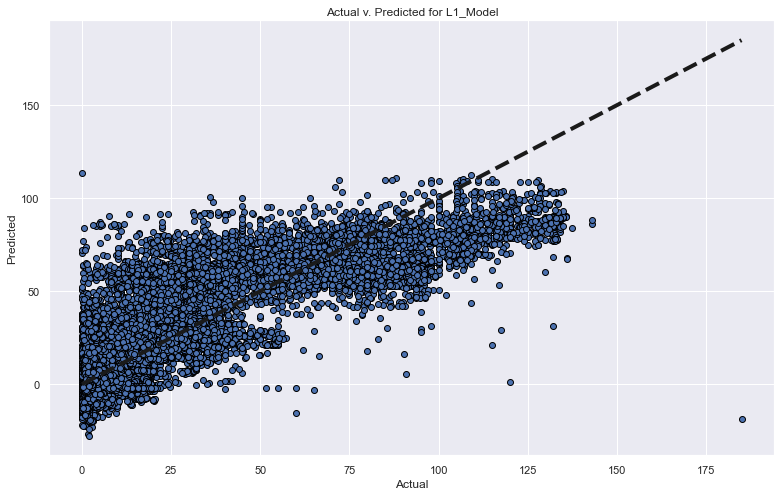

In [57]:
#source
predicted = cross_val_predict(l1_model, scale_data, target, cv=cv)

fig, ax = plt.subplots(figsize=(13, 8))
ax.scatter(target, predicted, edgecolors=(0,0,0))
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Actual v. Predicted for L1_Model')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.show()

### Ridge

In [58]:
l2_model = Ridge(alpha=1)
l2_model.fit(scale_data,target)

Ridge(alpha=1)

In [59]:
l2_model.score(scale_data,target)

0.6951565688032684

In [60]:
alpha = 1E-5
for i in range(5):
    l2_model.alpha=alpha
    l2_model.fit(scale_data,target)
    print(alpha,l2_model.coef_)
    print("--------")
    alpha = alpha*10

1e-05 [ -3.17888915   2.70128721  -0.46112507   6.6620669    7.465042
  -1.81906188   1.47179857   2.22398208   1.23209754   4.54050469
   6.26802119  -2.56666604   8.82609717  -5.1804591   -5.81666516
  -0.13879714   1.3703113   -0.82572343  -2.42170119   2.41717076
   7.61302719  10.6912477   -4.51162789 -12.99125345  -5.97147734
  -3.96148619  -4.9381767   -2.36351877   2.31089713  -3.14768174
   0.16167946  -2.25974346  22.56181739   0.19740086 -16.04229768
   1.55078369   3.01782403   2.03536782  -4.66096753  -2.47105317
   3.4702479    4.14826488  -9.01878995]
--------
0.0001 [ -3.17888662   2.70128636  -0.46112391   6.66206951   7.46504197
  -1.8190619    1.47179929   2.22398074   1.2320973    4.5405035
   6.26801952  -2.56666493   8.82609576  -5.18045876  -5.81666243
  -0.13879789   1.37030818  -0.82572512  -2.42170181   2.41717088
   7.61302774  10.69124182  -4.51162852 -12.99124827  -5.97147811
  -3.96148647  -4.93817625  -2.36351682   2.3108975   -3.14768167
   0.16167953  -

In [61]:
alpha = 1E-5
for i in range(10):
    l2_model.alpha=alpha
    print(alpha, cross_val_score(l2_model,scale_data,target))
    print("--------")
    alpha = alpha*10

1e-05 [ 0.34484269  0.39141609  0.60223369 -0.80701983  0.45784139]
--------
0.0001 [ 0.34484268  0.39141609  0.60223371 -0.80701957  0.45784144]
--------
0.001 [ 0.34484264  0.39141608  0.60223389 -0.80701693  0.45784198]
--------
0.01 [ 0.34484216  0.39141604  0.60223569 -0.80699053  0.4578473 ]
--------
0.1 [ 0.34483745  0.39141562  0.60225369 -0.80672679  0.45790047]
--------
1.0 [ 0.34479012  0.39141112  0.60243167 -0.80411034  0.45842739]
--------
10.0 [ 0.34430307  0.39134237  0.60403923 -0.77987868  0.46326828]
--------
100.0 [ 0.33886758  0.38931084  0.61257881 -0.64194975  0.49053041]
--------
1000.0 [ 0.29537025  0.35866233  0.61724089 -0.47903689  0.53601648]
--------
10000.0 [ 0.15577276  0.23762251  0.56426134 -0.70214292  0.47807238]
--------


In [62]:
#lets look at mse since that is what we used in L1
alpha = 1E-5
for i in range(10):
    l2_model.alpha = alpha
    print("aplha =", alpha, "CVScore =", abs(cross_val_score(l2_model, scale_data, target, cv=cv, \
                                                        scoring= 'neg_mean_squared_error').mean()))
    print("----------")
    alpha = alpha *10

aplha = 1e-05 CVScore = 358.9356719252579
----------
aplha = 0.0001 CVScore = 358.9356716612953
----------
aplha = 0.001 CVScore = 358.93566902188405
----------
aplha = 0.01 CVScore = 358.93564264920644
----------
aplha = 0.1 CVScore = 358.93538106346676
----------
aplha = 1.0 CVScore = 358.9329768361621
----------
aplha = 10.0 CVScore = 358.92791685320856
----------
aplha = 100.0 CVScore = 359.7942174999539
----------
aplha = 1000.0 CVScore = 374.1344148535969
----------
aplha = 10000.0 CVScore = 437.7234586318282
----------
aplha = 100000.0 CVScore = 590.3518117656741
----------
aplha = 1000000.0 CVScore = 977.8166260241317
----------
aplha = 10000000.0 CVScore = 1148.0579603558008
----------
aplha = 100000000.0 CVScore = 1170.7766246465776
----------
aplha = 1000000000.0 CVScore = 1173.1236994725002
----------
aplha = 10000000000.0 CVScore = 1173.3591829063366
----------
aplha = 100000000000.0 CVScore = 1173.3827390338263
----------
aplha = 1000000000000.0 CVScore = 1173.38509472444

In [68]:
#final l2 model
l2_model = Ridge(alpha=10)
l2_model.fit(scale_data,target)
for i in range(len(scale_data.columns)):
    print(i, scale_data.columns[i],round(l1_model.coef_[i], 3))

0 number_of_elements -0.0
1 mean_atomic_mass 0.884
2 wtd_mean_atomic_mass 0.005
3 wtd_entropy_atomic_mass 7.821
4 range_atomic_mass 7.338
5 wtd_range_atomic_mass -0.719
6 mean_fie 2.776
7 wtd_mean_fie 0.352
8 wtd_entropy_fie -0.0
9 range_fie 2.956
10 wtd_range_fie 2.983
11 mean_atomic_radius -0.0
12 wtd_mean_atomic_radius 4.512
13 wtd_range_atomic_radius -3.443
14 mean_Density -3.486
15 wtd_mean_Density 0.0
16 gmean_Density -0.386
17 wtd_entropy_Density -1.145
18 range_Density -2.315
19 wtd_range_Density 1.452
20 mean_ElectronAffinity 2.596
21 wtd_mean_ElectronAffinity 4.803
22 gmean_ElectronAffinity -0.295
23 wtd_gmean_ElectronAffinity -8.533
24 wtd_entropy_ElectronAffinity -6.734
25 range_ElectronAffinity -1.444
26 wtd_range_ElectronAffinity -2.911
27 wtd_std_ElectronAffinity -0.893
28 mean_FusionHeat 1.533
29 range_FusionHeat -2.44
30 wtd_range_FusionHeat 0.0
31 mean_ThermalConductivity 0.0
32 wtd_mean_ThermalConductivity 19.286
33 gmean_ThermalConductivity -0.0
34 wtd_gmean_Thermal

In [69]:
mse = round(mean_squared_error(target, l2_model.predict(scale_data)), ndigits = 3)
print('MSE_Model_L2=',mse)

MSE_Model_L2= 357.69


In [70]:
l2_model.alpha = 10
l2_model.fit(scale_data,target)
l2_model.score(scale_data,target)

0.6951432206461858

In [71]:
#feature importance
l2_important = l2_model.coef_
l2_important = pd.DataFrame(l2_important, index = scale_data.columns, columns = ['L2_coeff'])
l2_important = l2_important.iloc[(-np.abs(l2_important['L2_coeff'].values)).argsort()]
l2_important.head(20)

,L2_coeff
wtd_mean_ThermalConductivity,22.079454
wtd_gmean_ThermalConductivity,-15.771593
wtd_gmean_ElectronAffinity,-12.470523
wtd_mean_ElectronAffinity,10.099320
wtd_std_Valence,-8.996064
wtd_mean_atomic_radius,8.674207
mean_ElectronAffinity,7.644762
range_atomic_mass,7.458688
wtd_entropy_atomic_mass,6.925131
wtd_range_fie,6.091784


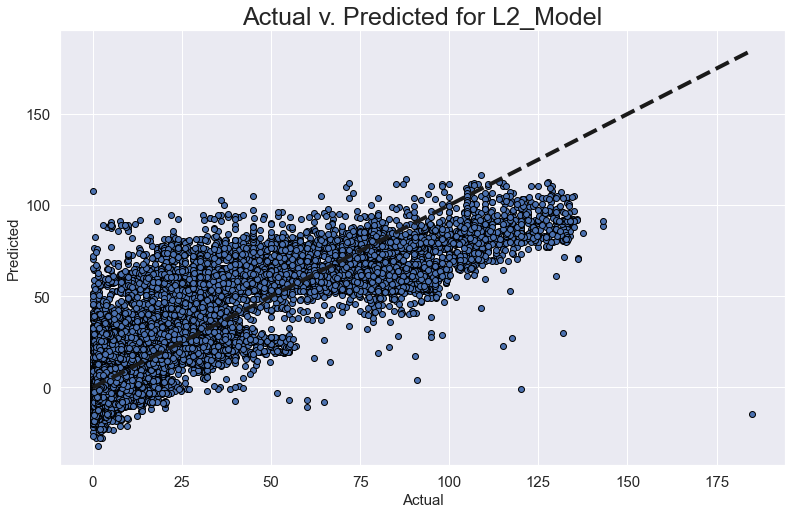

In [72]:
predicted = cross_val_predict(l2_model, scale_data, target, cv=cv)

fig, ax = plt.subplots(figsize=(13, 8))
ax.scatter(target, predicted, edgecolors=(0,0,0))
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Actual v. Predicted for L2_Model')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.show()